In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Articles.csv',  encoding = "ISO-8859-1")

In [4]:
data.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [5]:
data.shape

(2692, 4)

In [6]:
data['Article'] = data['Heading'] + ' ' +data['Article'] 

In [7]:
data = data[['Article']]

In [8]:
data.head()

,Article
0,sindh govt decides to cut public transport far...
1,asia stocks up in new year trad HONG KONG: Asi...
2,hong kong stocks open 0.66 percent lower HONG ...
3,asian stocks sink euro near nine year HONG KO...
4,us oil prices slip below 50 a barr NEW YORK: U...


In [9]:
#Fetch wordcount for each abstract
data['WordCount'] = data['Article'].apply(lambda x: len(str(x).split()))
data.head()

,Article,WordCount
0,sindh govt decides to cut public transport far...,118
1,asia stocks up in new year trad HONG KONG: Asi...,743
2,hong kong stocks open 0.66 percent lower HONG ...,44
3,asian stocks sink euro near nine year HONG KO...,530
4,us oil prices slip below 50 a barr NEW YORK: U...,614


In [10]:
#Identify common words
freq = pd.Series(' '.join(data['Article']).split()).value_counts()[:20]
print(freq)

the     41920
to      22305
in      20439
of      18671
and     17152
a       16717
for      9576
on       9095
at       5939
with     5633
that     5225
was      5202
as       5013
is       4547
by       4546
from     4431
said     4403
his      3448
will     3385
has      3383
dtype: int64


In [11]:
#Identify uncommon words
freq1 = pd.Series(' '.join(data['Article']).split()).value_counts()[-20:]
print(freq1)

thre                                            1
Law,                                            1
225,                                            1
</strongChris                                   1
responsiveness                                  1
2010)                                           1
debt.Investors'                                 1
href="https://bit.ly/28KxqNM">foodpanda</a>,    1
$77.7                                           1
-</strongPakistan                               1
132.02                                          1
destination.There                               1
Escober.Argentina                               1
association´s                                   1
months.But                                      1
US$55                                           1
May.He                                          1
left.Ukraine                                    1
burger                                          1
month-long,                                     1


In [12]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [13]:
corpus = []
for i in range(0, len(data)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Article'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
       
    
    #stopwords
    text = text.split()
    stop_words = set(stopwords.words("english"))
    text = [word for word in text if not word in  stop_words] 
    text = " ".join(text)
    
    #Stemming
    ps=PorterStemmer()

    #Lemmatisation
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text]
    text = " ".join(text)
    
    corpus.append(text)

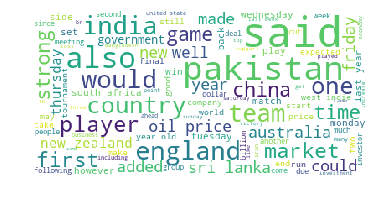

In [14]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
# creating a vector of words
from sklearn.feature_extraction.text import CountVectorizer
import re

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [16]:
list(cv.vocabulary_.keys())[:10]

['sindh',
 'govt',
 'decides',
 'cut',
 'public',
 'transport',
 'fare',
 'pc',
 'karachi',
 'government']

D:\Users\Ritvik\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0,'said'),
 Text(0,0,'year'),
 Text(0,0,'pakistan'),
 Text(0,0,'percent'),
 Text(0,0,'first'),
 Text(0,0,'strong'),
 Text(0,0,'oil'),
 Text(0,0,'world'),
 Text(0,0,'price'),
 Text(0,0,'two'),
 Text(0,0,'last'),
 Text(0,0,'also'),
 Text(0,0,'new'),
 Text(0,0,'market'),
 Text(0,0,'one'),
 Text(0,0,'england'),
 Text(0,0,'match'),
 Text(0,0,'test'),
 Text(0,0,'day'),
 Text(0,0,'team')]

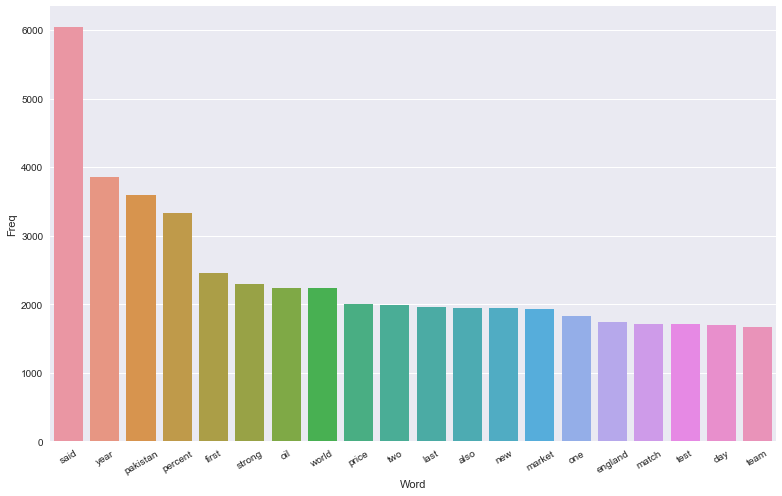

In [17]:
# Visualize top N uni-grams, bi-grams & tri-grams
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

           Bi-gram  Freq
0        oil price   688
1        sri lanka   659
2      new zealand   557
3        last year   511
4     south africa   473
5       west indie   459
6         year old   445
7     united state   327
8        last week   321
9    interest rate   297
10       world cup   289
11        new york   284
12    world twenty   283
13  million barrel   279
14    saudi arabia   260
15         one day   239
16       hong kong   232
17      first time   230
18  prime minister   227
19    central bank   218


D:\Users\Ritvik\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0,'oil price'),
 Text(0,0,'sri lanka'),
 Text(0,0,'new zealand'),
 Text(0,0,'last year'),
 Text(0,0,'south africa'),
 Text(0,0,'west indie'),
 Text(0,0,'year old'),
 Text(0,0,'united state'),
 Text(0,0,'last week'),
 Text(0,0,'interest rate'),
 Text(0,0,'world cup'),
 Text(0,0,'new york'),
 Text(0,0,'world twenty'),
 Text(0,0,'million barrel'),
 Text(0,0,'saudi arabia'),
 Text(0,0,'one day'),
 Text(0,0,'hong kong'),
 Text(0,0,'first time'),
 Text(0,0,'prime minister'),
 Text(0,0,'central bank')]

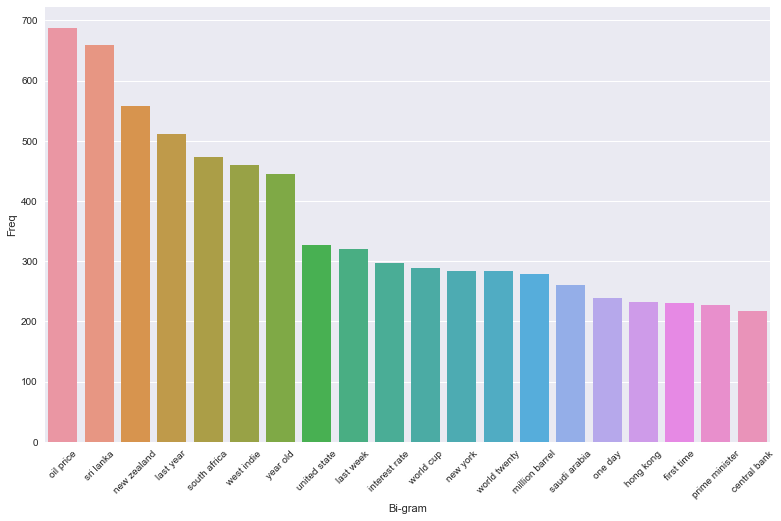

In [18]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                            Tri-gram  Freq
0            west texas intermediate   197
1              one day international   132
2                     barrel per day   131
3               benchmark west texas   122
4             pakistan cricket board   104
5                      misbah ul haq   104
6                 million barrel per   102
7        petroleum exporting country    92
8              pakistan super league    92
9   organization petroleum exporting    90
10            texas intermediate wti    88
11               singapore oil price    84
12       international monetary fund    78
13                  world number one    77
14     international cricket council    77
15                 cricket board pcb    75
16                  left arm spinner    73
17             minister nawaz sharif    69
18             pakistan cricket team    68
19              prime minister nawaz    67


D:\Users\Ritvik\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0,'west texas intermediate'),
 Text(0,0,'one day international'),
 Text(0,0,'barrel per day'),
 Text(0,0,'benchmark west texas'),
 Text(0,0,'pakistan cricket board'),
 Text(0,0,'misbah ul haq'),
 Text(0,0,'million barrel per'),
 Text(0,0,'petroleum exporting country'),
 Text(0,0,'pakistan super league'),
 Text(0,0,'organization petroleum exporting'),
 Text(0,0,'texas intermediate wti'),
 Text(0,0,'singapore oil price'),
 Text(0,0,'international monetary fund'),
 Text(0,0,'world number one'),
 Text(0,0,'international cricket council'),
 Text(0,0,'cricket board pcb'),
 Text(0,0,'left arm spinner'),
 Text(0,0,'minister nawaz sharif'),
 Text(0,0,'pakistan cricket team'),
 Text(0,0,'prime minister nawaz')]

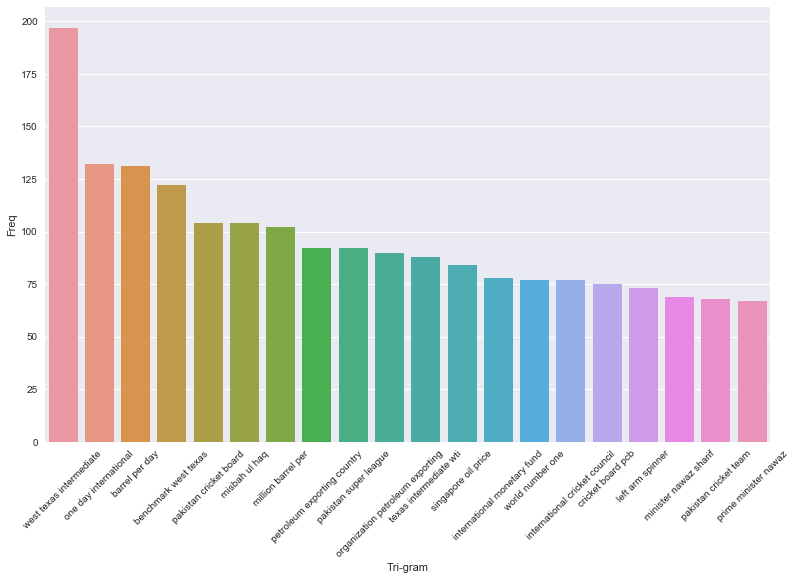

In [19]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [21]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores

sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
gold eas underpinned weaker dollar strong melbourne spot gold eased monday found support weaker dollar u european central bank kept alive prospect cheaper capital longer strongas central bank rhetoric turn dovish investor search hint easing week data release indicate whether year loose monetary policy material effect central bank however leaving fewer policy tool mean diminishing window fresh upside gold based easing step said chief investment officer jonathan barratt ayers alliance sydney mind still concern price spot gold edged percent ounce gmt finished last week tad higher price consolidating month peak struck march loftiest since jan price slumped tonne december u gold eased percent market indicator flashing sign investor see inflation almost non existent since credit crisis rise despite scepticism fed relatively slow pace u economic growth inflation tends burnish investment allure commodity consists rise value hard asset supporting precious metal dollar stayed defensiv